# Data Wrangling WeRateDogs - Twitter @dog_rates

##### Author: Otto Roberson

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>    
<li><a href="#load">Load Libraries</a></li>
<li><a href="#gather">Gather the Data</a>
    <ul>
        <li><a href="#archive-g">Twitter Archive</a></li>
        <li><a href="#predictions-g">Image Predictions</a></li>
        <li><a href="#api-g">API Data</a></li>
    </ul>
<li><a href="#assess">Assess the Data</a>
    <ul>
        <li><a href="#archive-a">`twitter_archive`</a></li>
        <li><a href="#predictions-a">`predictions`</a></li>
        <li><a href="#api-a">`Twitter API data`</a></li>
        <li><a href="#data-s">Data Selection</a></li>
        <li><a href="#findings">Findings</a></li>
    </ul>
<li><a href="#clean">Clean the Data</a></li>
<li><a href="#analysis">Analysis & Visualization</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The purpose of this project is to put in practice what I've learned so far. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

<a id='load'></a>
## Load Libraries

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
import os
from os import path
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

<a id='gather'></a>
## Gather the Data

>1. **Twitter archive file:** download this file manually by clicking the following link: [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

>2. **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

>3. **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
>Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

<a id='archive-g'></a>
### Twitter Archive

In [2]:
# Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

<a id='predictions-g'></a>
### Image Predictions

In [3]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Create file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

<a id='api-g'></a>
### Twitter API Data

In [7]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [1]:
with open ('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # writes one tweet per line
            json.dump(tweet._json, file)
            file.write('\n')          
        except:
            continue
    print('Finished')

NameError: name 'twitter_archive' is not defined

In [9]:
# For loop to append each tweet into a list
tweets = []

tweet_json = open('tweet_json.txt', "r")

for line in tweet_json:
    try:
        tweet = json.loads(line)
        tweets.append(tweet)
    except:
        continue
        
tweet_json.close()

In [10]:
# Create a DataFrame to hold the tweet info we want
tweet_info = pd.DataFrame()

In [11]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

<a id='assess'></a>
## Assess the Data

In [21]:
# Set the characters in column so text isn't truncated
# -1 is everything
pd.set_option('display.max_colwidth', -1)

<a id='archive-a'></a>
### `twitter_archive` data

> The information from the twitter_archive is stored in the twitter_archive DataFrame.

In [22]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [23]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [24]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She enjoys her stick in the yard. Very content. Much tranquility. 10/10 keep it up pup https://t.co/eYP9i9gfYn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965569282048/photo/1,10,10,Maggie,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY"" ...10/10 https://t.co/uhQNehTpIu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889858887680/photo/1,10,10,None,None,None,None,None
102,872620804844003328,NaN,NaN,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Monkey. She's supporting owners everywhere with her fancy #PrideMonth bandana. 13/10 love is love is love... https://t.co/lUcpnZDPz9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872620804844003328/photo/1,13,10,Monkey,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156699303936/photo/1,9,10,Klevin,None,None,None,None
617,796387464403357696,NaN,NaN,2016-11-09 16:22:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Snicku. He's having trouble reading because he's a dog. Glasses only helped a little. Nap preferred. 12/10 would snug well https://t.co/cVLUasbKA5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/796387464403357696/photo/1,https://twitter.com/dog_rates/status/796387464403357696/photo/1",12,10,Snicku,None,None,None,None


In [25]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
# For the 'doggo', floofer', 'pupper' and 'puppo' columns, count the number of values other than 'None' 
(twitter_archive.loc[:,'doggo':'puppo'] != 'None').sum()

doggo      97 
floofer    10 
pupper     257
puppo      30 
dtype: int64

In [27]:
# Get a count of the 'text' cell containing 'doggo', 'floofer', 'pupper', and 'puppo'
for column in twitter_archive.columns[-4:]:
    print(column, twitter_archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [28]:
# Check name
twitter_archive[['text', 'name']].sample(10)

,text,name
892,This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.co/vT3JM8b989,Oakley
1319,Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10 https://t.co/KUS0xl7XIp,None
948,Here's a doggo trying to catch some fish. 8/10 futile af (vid by @KellyBauerx) https://t.co/jwd0j6oWLE,None
467,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,None
1201,This is Ozzy. He's acrobatic af. Legendary pupper status achieved. 13/10 https://t.co/gHWsCTu90E,Ozzy
2207,This is Timofy. He's a pilot for Southwest. It's Christmas morning &amp; everyone has gotten kickass gifts but him. 9/10 https://t.co/3FuNbzyPwo,Timofy
712,This is Stormy. He's curly af. Already pupared for Coachella next year. 12/10 https://t.co/PHA1vtqqpt,Stormy
1980,This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1,Chuckles
2273,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,a
1945,This is Raymond. He's absolutely terrified of floating tennis ball. 10/10 it'll be ok pupper https://t.co/QyH1CaY3SM,Raymond


In [31]:
# From the 'text' column, view rows which contain '&amp;' 
twitter_archive[twitter_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,

In [32]:
# Sort values of 'name' column 
twitter_archive.name.sort_values()

1035    Abby 
1021    Abby 
938     Ace  
1933    Acro 
1327    Adele
        ...  
1031    very 
773     very 
1097    very 
819     very 
1385    very 
Name: name, Length: 2356, dtype: object

In [33]:
# View rows where the value of 'name' is lowercase 
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


> Observation: There are numerous lower-case values which aren't really names.
> There are too many to drop unless I do it as a special case, after the rest of 
> the data has been treated. 
> It doesn't look as if it would add much value to the analysis.

In [34]:
# Example of missing name
twitter_archive.text[751]

"Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5"

In [35]:
# Example of two names
twitter_archive.text[2232]

'These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh'

In [36]:
# Another look at the names
twitter_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
           .. 
Skye       1  
Kevon      1  
Jareld     1  
Major      1  
Goose      1  
Name: name, Length: 957, dtype: int64

In [37]:
# Find out more about the 'rating_numerator'
twitter_archive.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [38]:
# Show the unique values for the 'rating_numerator'
np.sort(twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [39]:
# Find out more about the 'rating_denominator'
twitter_archive.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [40]:
# Show the unique values for the 'rating_denominator'
np.sort(twitter_archive['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [41]:
# Check the null values
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [42]:
# Look at the unique values
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [43]:
# Check for duplicated 'tweet_id'
twitter_archive['tweet_id'].duplicated().sum()

0

In [44]:
# Check for the number of dogs that don't have any dog type assigned
len(twitter_archive.loc[(twitter_archive['doggo']== 'None') & (twitter_archive['floofer']== 'None') & (twitter_archive['pupper']== 'None') & (twitter_archive['puppo']== 'None')])

1976

In [45]:
#disable warnings
warnings.simplefilter('ignore')

In [46]:
# Find ratings with decimal numbers
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


<a id='predictions-a'></a>
### `predictions` 

> The image prediction information is stored in the predictions DataFrame.

In [41]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [43]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
851,695794761660297217,https://pbs.twimg.com/media/Caf1pQxWIAEme3q.jpg,1,Samoyed,0.962139,True,Arctic_fox,0.030553,False,white_wolf,0.001482,False
444,674644256330530816,https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg,1,soccer_ball,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True


In [44]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [46]:
predictions['tweet_id'].duplicated().sum()

0

In [47]:
predictions['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [48]:
predictions['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [49]:
predictions['p2_dog'].value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [50]:
predictions['p3_dog'].value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

<a id='api-a'></a>
### Twitter `API data`

> The Twitter API data is stored in the tweet_info DataFrame. 

In [12]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


In [13]:
tweet_info.sample(5)

,id,retweet_count,favorite_count
1891,674737130913071104,102,685
1015,746726898085036033,2023,6606
624,794355576146903043,11896,0
2126,670079681849372674,1357,2369
1962,673320132811366400,8616,14331


In [15]:
tweet_info['id'].duplicated().sum()

0

In [16]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
id                2350 non-null int64
retweet_count     2350 non-null int64
favorite_count    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.350000e+03,2350.000000,2350.000000
mean,7.425233e+17,3104.064681,8110.702553
std,6.844886e+16,5138.133282,12033.993390
min,6.660209e+17,0.000000,0.000000
25%,6.783910e+17,617.000000,1418.000000
50%,7.193360e+17,1447.500000,3589.000000
75%,7.989319e+17,3612.250000,10108.250000
max,8.924206e+17,78839.000000,131922.000000


<a id='data-s'></a>
### Data Selection

>I'll be using the following criteria for data selection:
> - Do not include retweets, as including them would skew the data
> - Include only tweets with images
> - Only include original tweets, there are reply tweets which imply multiple data points for the same dog

<a id='findings'></a>
### Findings

#### Quality

##### `twitter_archive` 
- Dataset has retweets and replies  
- Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns)
- Missing info / images in `expanded_urls`
- `text` and `rating_numerator` columns include more than one rating & decimals
  - Wrong or missing data in the `rating_numerator` and `rating_denominator` column
- `text` column includes both text and short version of link
- Second dog name missing if two are mentioned
- Nulls represented as "None" (str) for `name`, `doggo`, `floofer`, `pupper`, and `puppo` columns
- Missing names identified from `text` in `name` 
- Some names identified are not names

##### `predictions` 
- Erroneous datatype (tweet_id)
- Tweets with no images
- p1,p2,p3 columns: dog breeds are not consistently lower or uppercase

##### `api_data` 
- Erroneous datatype (tweet_id)
- Retweet and favorite information is not available for all tweets and cannot be retrieved

#### Tidiness

- The 'twitter_archive' dataset could be joined with the 'predictions' and the api data in 'tweet_info'.

##### `twitter_archive` 
- Multiple columns with similar data which could be merged
  - For example `doggo`, `floofer`, `pupper` and `puppo` all contain dog data

##### `predictions` 
- Multiple columns with similar data which could be merged
  - For example `p1`, `p2`, `p3` all contain predictions for dog breed 
- The prediction confidence could be merged into one column 
- jpg_url, breed_pred and pred_confidence could be joined to the `twitter_archive` DataFrame

##### Twitter `api_data` in tweet_info
- This data is separate from other tweet data
  - `favorite_count` and `retweet_count` columns could be joined to the `twitter_archive` DataFrame

<a id='clean'></a>
## Clean the Data

In [18]:
# Make copies to preserve the original datasets
archive_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
api_clean = tweet_info.copy()

##### Issues: 

> Tidiness issue 1: Extraneous dog stages, merge into one variable.
>
> Tidiness issue 2: Drop unneeded columns.

##### Define
> Create one variable to hold the `doggo`, `floofer`, `pupper`, and `puppo` data.
>
>Then, remove these columns.
>
>We expect many NaN values.

##### Code

In [48]:
# Create 'dog_stage' variable to hold the data 
archive_clean['dog_stage'] = archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [49]:
dropped_columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean = archive_clean.drop(dropped_columns, axis=1)

##### Test

In [50]:
# Check the dogs
archive_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a colle

##### Issue:
> 
>Tidiness issue 3: Data is spread across three tables which can be combined.
> 


##### Define

> Join the `archive` table data with `api_clean` and `predictions`.

In [53]:
archive_clean = pd.merge(left=archive_clean, right=api_clean, left_on='tweet_id', right_on='id', how='inner')

In [54]:
archive_clean = archive_clean.merge(predictions_clean, on='tweet_id', how='inner')

In [55]:
archive_clean = archive_clean.drop('id', axis=1)

##### Test

In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 27 columns):
tweet_id                      2071 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2071 non-null object
source                        2071 non-null object
text                          2071 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2071 non-null object
rating_numerator              2071 non-null int64
rating_denominator            2071 non-null int64
name                          2071 non-null object
dog_stage                     338 non-null object
retweet_count                 2071 non-null int64
favorite_count                2071 non-null int64
jpg_url                       2071 non-null object
img_num                       2071 non

##### Issue:
> 
>Cleanliness issue 1: Rows without images in `expanded_url`
> 

##### Define

- Remove the `expanded_url` rows without images.

In [57]:
archive_clean = archive_clean.dropna(subset=['expanded_urls'])

##### Test

In [58]:
sum(archive_clean['expanded_urls'].isnull())

0

##### Issue:
> 
>Cleanliness issue 2: Rows with retweets
> 

##### Define

> Remove retweets: 
>
> I'll select the rows where `retweeted_status_id` is null, and save them in `archive_clean`.

##### Code

In [59]:
# Select the rows to save
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

##### Test

In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2070
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_stage                     326 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-nu

##### Issue:
> 
>Cleanliness issue 3: Retweeted columns need to be removed
> 

##### Define

> Remove the retweeted columns: 
>
> `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

##### Code


In [61]:
# Drop all retweet-related columns 
dropped_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean = archive_clean.drop(dropped_columns, axis=1)

##### Test

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2070
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

##### Issue:
> 
>Cleanliness issue 4: Some `name` values are `None`, change to `NaN`
> 

##### Define

> Replace `None` values in `name` to `NaN`.

##### Code

In [63]:
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)

##### Test 

In [64]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2070
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1448 non-null object
dog_stage                326 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

##### Issues:
> 
>Cleanliness issue 5: Some ratings have decimals and the datatype needs to be changed.
>
>Cleanliness issue 6: The corresponding numerators will need to be updated afterwards.

##### Define

> Fix ratings that have decimals by changing the datatype to float.
>
> Then, update the corresponding numerators in the tweets that have decimals.

##### Code

In [65]:
# View tweets with ratings expressed in decimals
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
555,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
611,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1449,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [66]:
# Change the datatypes to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [67]:
# Update the correct numerators in the above tweets
archive_clean.loc[(archive_clean['tweet_id'] == 883482846933004288) & (archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
archive_clean.loc[(archive_clean['tweet_id'] == 786709082849828864) & (archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == 778027034220126208) & (archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
archive_clean.loc[(archive_clean['tweet_id'] == 680494726643068929) & (archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

##### Test

In [68]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
555,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
611,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1449,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


##### Issues:
> 
>Cleanliness issue 7: Wrong datatype in `timestamp`, change to datetime
>
>Cleanliness issue 8: Assign categorical to `dog_stage`
>
>Cleanliness issue 9: Assign string to `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id

##### Define

> Change datatypes of various fields: 
>
>`timestamp` to datetime
>
>`dog_stage` to categorical
>
>`tweet_id`, `in_reply_to_status_id`, and `in_reply_to_user_id` to strings.

In [69]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean['in_reply_to_status_id'] = archive_clean['in_reply_to_status_id'].astype('str')
archive_clean['in_reply_to_user_id'] = archive_clean['in_reply_to_user_id'].astype('str')

#### Test

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2070
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns, UTC]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1448 non-null object
dog_stage                326 non-null category
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf

In [71]:
# Save clean DataFrame to csv file
archive_clean.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## Analyze and Visualize

In [72]:
# Set the timestamp so that plots correctly display timeline
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [76]:
# Rename the dataframe to save time
df = archive_clean

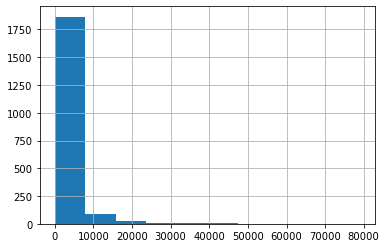

In [77]:
# Histogram of the retweet_count
df.retweet_count.hist();

In [78]:
df.retweet_count.describe()

count    1994.000000 
mean     2762.679037 
std      4732.483030 
min      14.000000   
25%      621.000000  
50%      1342.000000 
75%      3188.750000 
max      78839.000000
Name: retweet_count, dtype: float64

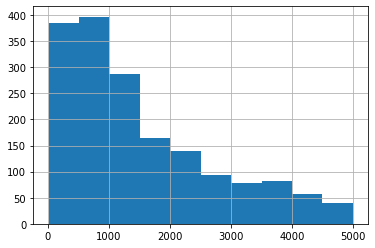

In [79]:
# Reset the histogram near the std value
df[df.retweet_count <= 5000].retweet_count.hist()

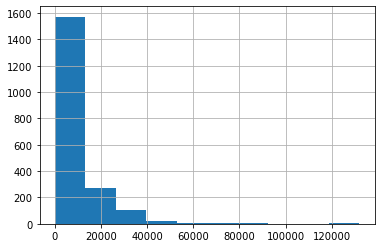

In [80]:
# Histogram of favorite_count
df.favorite_count.hist()

In [82]:
df.favorite_count.describe()

count    1994.000000  
mean     8912.370612  
std      12442.768857 
min      81.000000    
25%      1967.500000  
50%      4109.000000  
75%      11250.000000 
max      131922.000000
Name: favorite_count, dtype: float64

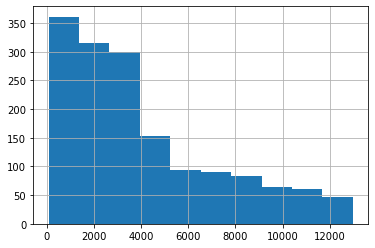

In [83]:
# Reset the histogram near the std value
df[df.favorite_count <= 13000].favorite_count.hist()

In [84]:
# Most popular names
df.name.value_counts().head(10)

a          55
Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny      9 
Tucker     9 
Sadie      8 
Winston    8 
Daisy      7 
Name: name, dtype: int64

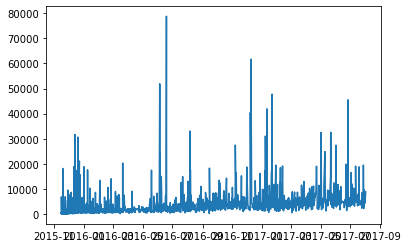

In [87]:
# Plot the retweet_count by timestamp
sns.set_context()
plt.plot(df.timestamp, df.retweet_count);

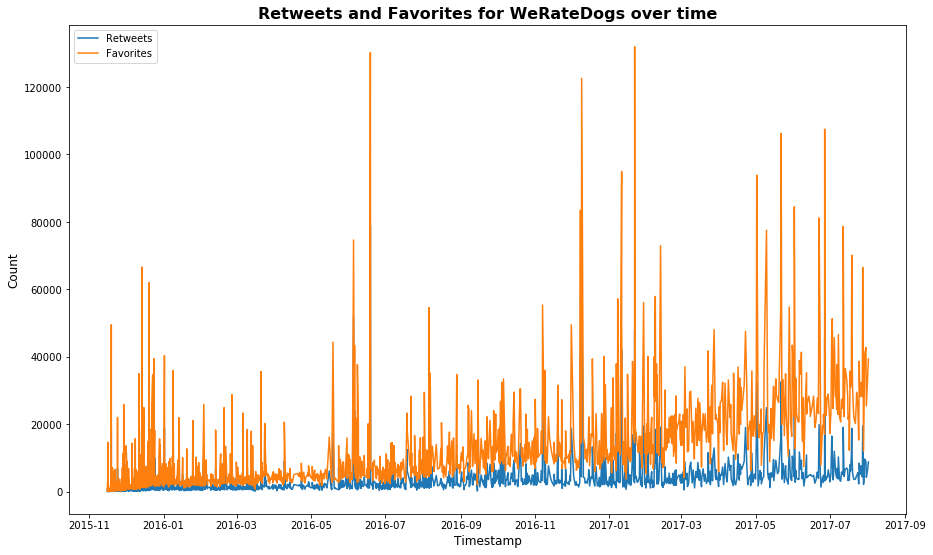

In [91]:
# Plot the retweets and favorites counts by timestamps
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.retweet_count, label='Retweets')
plt.plot(df.timestamp, df.favorite_count, label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Retweets and Favorites for WeRateDogs over time', fontsize=16, weight='bold')
plt.savefig('retweets_favorites.png');

In [92]:
# Take a look at dog_stage
dog_counts = df.groupby('dog_stage')['tweet_id'].count()
dog_counts

dog_stage
doggo      72 
floofer    3  
pupper     223
puppo      28 
Name: tweet_id, dtype: int64

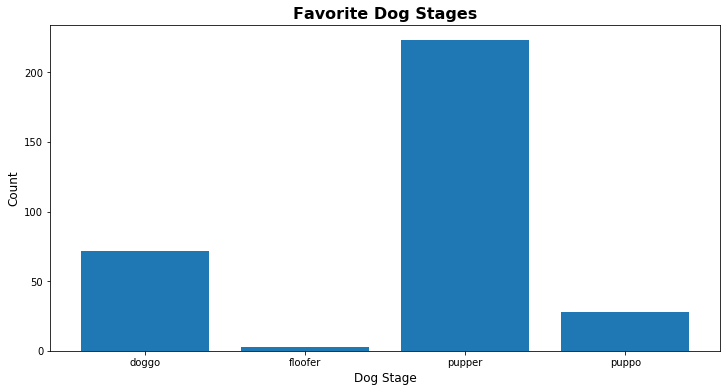

In [94]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4], dog_counts, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Favorite Dog Stages', fontsize=16, weight='bold')
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12);
plt.savefig('favorite-dogs.png')

In [114]:
df_text = df['text']

In [115]:
df_text.to_csv('df_text.csv')

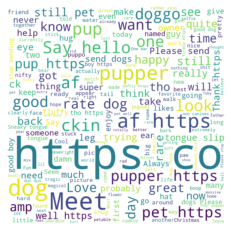

In [127]:
# Note: code below is from the wordcloud examples at https://amueller.github.io/

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'df_text.csv')).read()

stopwords = set(STOPWORDS)
stopwords.add('co')
stopwords.add('https')

# Generate a word cloud image
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('text_wordcloud.png')
plt.show()

##### Popular names

> Below I will show the top 10 names, dropping the `a` value.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('twitter_archive_master.csv')

In [7]:
# Get names of indexes where name is a
indexNames = df[ df['name'] == 'a' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

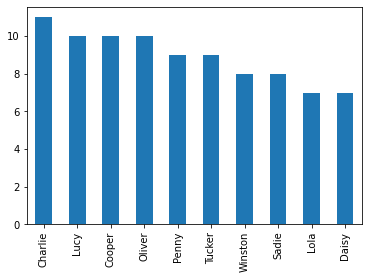

In [8]:
temp = df.name.value_counts()
temp.head(10).plot(kind='bar')
plt.savefig('names.png')

<a id='resources'></a>
## Resources

>
>-[twitter API tutorial](https://towardsdatascience.com/twitter-data-collection-tutorial-using-python-3267d7cfa93e)
>
>-[JSON resource with examples](https://realpython.com/python-json/)
>
>-[python JSON encoder & decoder documentation](https://docs.python.org/3/library/json.html)
>
>-[pandas.set](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.set_option.html)
>
>-[pandas str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)
>
>-[pandas str.extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)
>
>-[pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)
>
>-[pandas.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
>
>-[pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
>
>-[seaborn.set_context](https://seaborn.pydata.org/generated/seaborn.set_context.html)
>
>-[twitter data visualization](https://towardsdatascience.com/visualization-of-information-from-raw-twitter-data-part-1-99181ad19c)
> 
>-[More twitter data visualization](https://towardsdatascience.com/developing-good-twitter-data-visualizations-using-matplotlib-8e39906b6be6)
>
>-[wordcloud](https://github.com/amueller/word_cloud)
>